In [1]:
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
data = pd.read_csv('daxuli3.csv')
print(data.shape)
print(data.head())

(3256, 4)
   Milliseconds  PackVoltx100  Ampsx100  RPM
0             0          1250        37    0
1           100          1250        37    0
2           200          1250        37    0
3           300          1250        37    0
4           400          1250        37    0


In [2]:
data.describe()

,Milliseconds,PackVoltx100,Ampsx100,RPM
count,3256.000000,3256.000000,3256.000000,3256.000000
mean,162750.000000,1188.672604,776.113636,6403.512285
std,94007.056473,45.804262,579.316040,2557.755041
min,0.000000,1096.000000,0.000000,0.000000
25%,81375.000000,1150.000000,316.000000,5045.000000
50%,162750.000000,1196.000000,660.000000,6863.000000
75%,244125.000000,1229.000000,1339.000000,8695.000000
max,325500.000000,1250.000000,1935.000000,10020.000000


In [3]:
data.isnull().sum()

Milliseconds    0
PackVoltx100    0
Ampsx100        0
RPM             0
dtype: int64

In [4]:
X=data.drop(columns=['PackVoltx100'])
y=data['PackVoltx100']
y,X

(0       1250
 1       1250
 2       1250
 3       1250
 4       1250
         ... 
 3251    1174
 3252    1174
 3253    1174
 3254    1174
 3255    1174
 Name: PackVoltx100, Length: 3256, dtype: int64,
       Milliseconds  Ampsx100  RPM
 0                0        37    0
 1              100        37    0
 2              200        37    0
 3              300        37    0
 4              400        37    0
 ...            ...       ...  ...
 3251        325100         0    0
 3252        325200        18    0
 3253        325300        18    0
 3254        325400        18    0
 3255        325500        18    0
 
 [3256 rows x 3 columns])

<AxesSubplot:>

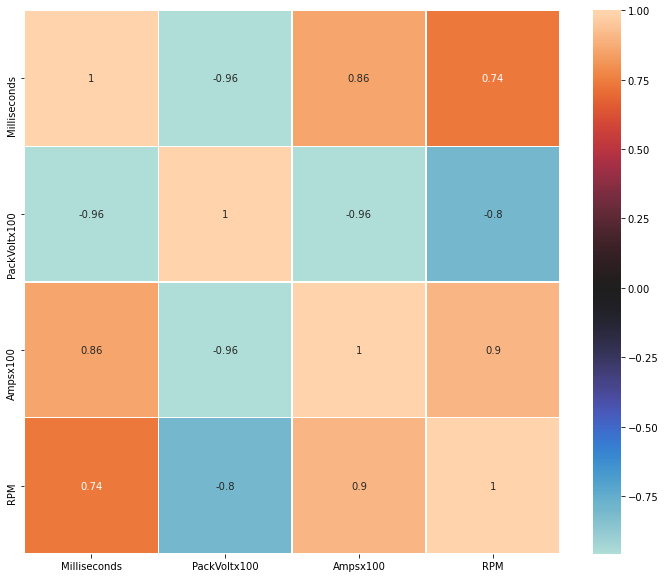

In [9]:
import seaborn as sns
plt.figure(figsize=(12,10)) # Correlation diagram of features  
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0,  annot= True, linewidths=0.2)

<AxesSubplot:xlabel='Milliseconds'>

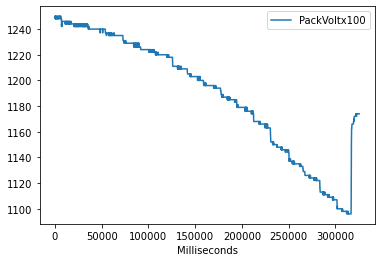

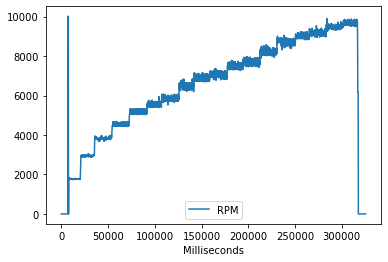

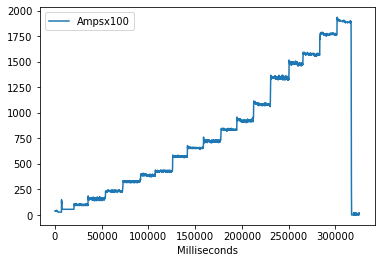

In [25]:
data.plot('Milliseconds','PackVoltx100')
data.plot('Milliseconds','RPM')
data.plot('Milliseconds','Ampsx100')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Divide the data into 2 train set and test set
model=Lasso(alpha=1.0)
model.fit(X_train, y_train)
y_predic=model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
print('Acc',mean_absolute_percentage_error(y_test,y_predic))
print('MSE', mean_squared_error(y_test, y_predic))

Acc 0.0017582434428190135
MSE 13.89418879277832


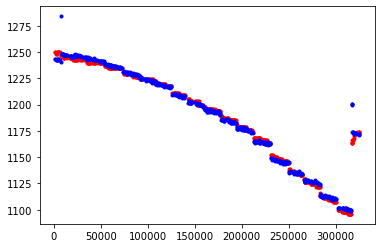

In [8]:
xlab=X_test['Milliseconds']
plt.plot(xlab, y_test, '.r')
plt.plot(xlab, y_predic, '.b')
plt.show()